<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)
  
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  
**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Pre-Processing**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>

**8.** [**Exploratory Data Analysis**](#Section8)<br>
   - **8.1** [**Season Level Analysis**](#Section81)
   - **8.2** [**Team Level Analysis**](#Section82)
   - **8.3** [**Top Team Analysis**](#Section83)
   - **8.4** [**Point Level Analysis**](#Section84) 
   
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

<p align="center"><img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/f2/Premier_League_Logo.svg/1200px-Premier_League_Logo.svg.png"></p>

<a name = Section1></a>
# **1. Introduction**
---
English Premier League or just Premier League is the world’s league. It has become a global phenomenon, inspiring passion and emotion and is the most-watched sports league in the world. It is broadcasted in 212 territories to 643 million homes and a potential TV audience of 4.7 billion people. 

Premier League started since the season of 1992-1993. The Premier League is a private company wholly owned by its independent 20 members club, these shareholders make up the League. The Premier League is the organizing body of the Premier League with responsibility for the competition, its rule book and the centralized broadcast and other commercial rights. 

The league takes place between August to May and currently a total of 20 clubs are part of this league and they play a total of 38 matches each in home and away match format. The League operates on a system of promotion and relegation.

The principal objective of the Premier League is to stage the most competitive and compelling league with world-class players; and through the equitable distribution of broadcast and commercial revenues, to enable clubs to develop and play at a level where they can compete effectively.

<a name = Section2></a>
# **2. Problem Statement**
---
Over the years, season by season, Premier League produced a considerable amount of data that can be leveraged to learn from and implement in the enhancement of the teams’ performance. Also, as an investor/ sponsor, a data driven logical decision can be taken before investing/ sponsoring a team.

Pointers around which analyses will be performed:

- Season Level Analysis
    - Total matches played
    - Number of teams played
    - Total goals scored
    - Home vs Away goals scored
    - Average goals scored per match
---    
- Team Level Analysis
    - Total matches played
    - Number of seasons played
    - Total goals scored vs conceded
    - Total Home vs Away goals scored & conceded
    - Home & Away team goals scored vs conceded
    - Goal difference for Home & Away team
    - Home & Away team match result
    - Home & Away team comeback while being behind at half-time
    - Home ground advantage    
---   
- Top Team Analysis (teams who played the maximum & equal number of matches)
    - Home and Away goal scored vs conceded 
    - Home vs Away match result
---    
- Point Level Analysis
    - Champion per Season

<a id = Section3></a>
# **3. Installing & Importing Libraries**

<a name = Section31></a>
### **3.1 Installing Libraries**

In [68]:
# Package required by pandas-profiling library
!pip install -q datascience 
#---------------------------------------------------------------------------------------------------------------------------
# Library to generate basic statistics about data
!pip install -q pandas-profiling

<a name = Section32></a>
### **3.2 Upgrading Libraries**

In [69]:
!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [70]:
# Importing warning to disable runtime warnings
import warnings
# Warnings will appear only once
warnings.filterwarnings("ignore")
#---------------------------------------------------------------------------------------------------------------------------
# Importing for panel data analysis
import pandas as pd
# Importing Pandas Profiling (To generate Univariate Analysis)
from pandas_profiling import ProfileReport
#---------------------------------------------------------------------------------------------------------------------------
# Importing package numpys (For Numerical Python)
import numpy as np
#---------------------------------------------------------------------------------------------------------------------------
# Importing seaborn library for interactive visualization
import seaborn as sns  
#---------------------------------------------------------------------------------------------------------------------------
# Importing pyplot interface of matplotlib
import matplotlib.pyplot as plt

<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- Below features provide information about the dataset:

|Id|Feature|Description|
|:--:|:--:|:--|
|01|Div|The division the match was played in.| 
|02|Date|The date the match was played.| 
|03|HomeTeam|The name of the home team.| 
|04|AwayTeam|The name of the away team.|
|05|FTHG|The total number of goals scored by the home team during the match at full time.|
|06|FTAG|The total number of goals scored by the away team during the match at full time.|
|07|FTR|The full time result ('H' for home team win, 'A' for away team win, or 'D' for draw).|
|08|HTHG|The total number of goals scored by the home team at half time.|
|09|HTAG|The total number of goals scored by the away team at half time.|
|10|HTR|The half time result ('H' for home team advantage, 'A' for away team advantage, or 'D' for draw).|
|11|Season|The season in which the match was played.|

In [71]:
# reading the file from its source and assigning
original_df = pd.read_csv(r'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/English_Premier_League.csv')

# checking the shape of the dataset
original_df.shape

(9664, 11)

In [72]:
# checking the 1st 3 rows 
original_df.head(3)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94


<a name = Section41></a>
### **4.1 Data Description**

- For statistical insight

In [73]:
original_df.describe()

,FTHG,FTAG,HTHG,HTAG
count,9664.000000,9664.000000,8740.000000,8740.000000
mean,1.523903,1.121482,0.685469,0.488444
std,1.301671,1.121667,0.833581,0.710524
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,9.000000,8.000000,5.000000,5.000000


### **Observations:**

**Minimum Goals**: 
- Minimum full time goal for Home and Away ground is 0.

**Maximum Goals**:
- Maximum goals scored by HomeTeam is 9 whereas 8 for AwayTeam. 

**HTHG & HTAG**
- No advantge could be observed at half-time either for Home or Away Team.

<a name = Section42></a>
### **4.2 Data Information**

- For an overview of the dataset

In [74]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


### **Observations:**

- There are **9664 rows** and **11 columns** (matches with .shape).

- The **data types** to be converted for **Date**, **HTHG** and **HTAG** features.

- There are **missing** values present in **HTHG**, **HTAG** and **HTR** features.

<a name = Section5></a>
# **5. Data Pre-Profiling**
---
- For quick analysis on the dataset

In [75]:
profile = ProfileReport(df=original_df)
profile.to_file(output_file='Pre-Profiling English_Premier_League Report.html')
print('DONE!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

DONE!


### **Observations :**

- There are **9664 observations** with **11 features**. The features consists of **7 Categorical** and **4 Numeric** data types.

- **Div** feature has only 1 distinct value <> E0.

- **Date** feature has different formats <> **dd/mm/yyyy** and **dd/mm/yy**

- In total there are **50 teams**.

- A lot of **zeros** are present in **FTHG**, **FTAG**, **HTHG** and **HTAG** features.

- **FTHG max goal scored: 9**, **FTAG max goal scored: 8**.

- **Full-Time Result**: **46.2%** **HomeTeams** has **won** the match, **26.3%** ended in a **draw** and **27.5%** **AwayTeam** has **won** the match.

- **HTHG**, **HTAG** and **HTR** features have **924 missing** (9.6%) values each.

- **Half-Time Result**: **42.1%** result was a **draw**, **35.3%** **HomeTeam** was **advanced** and **22.6%** **AwayTeam** was **advanced**.

- This dataset consists of **25 seasons**, starting from **1993-94**.

- *For detailed information, check the Pre-Profiling English_Premier_League Report.html file.*

<a name = Section6></a>
# **6. Data Pre-Processing**
---
- Perform data cleaning operations on the dataset basis the observations made from the profiling report.

|Feature|Data Type|Missing Proportion|Solution|
|:--:|:--:|:--:|:--|
|Div|object|100%|Drop (constant).|
|Date|object|100%|Dtype to be DateTime & Format to be changed.|
|HTHG|float64|9.6%|Replace with median.|
|HTAG|float64|9.6%|Replace with median.|
|HTR|object|9.6%|Replace with mode.|

In [20]:
# creating a copy of the data for further analysis and to keep the original data intact
eng_pre_lea_df = original_df.copy()

# dropping the column 'Div' as it has constant value and no use for analysis
eng_pre_lea_df.drop(['Div'], axis = 1, inplace = True)

# assigning the dtype to datetime and aligning the different formats
eng_pre_lea_df['Date'] = pd.to_datetime(eng_pre_lea_df['Date'])
eng_pre_lea_df['Date'] = pd.to_datetime(arg = eng_pre_lea_df['Date'], format = '%d-%m-%Y')

# half-time Q2 value for Home and Away is 0 hence, filling the NaNs with 0 and changing the dtype to int
eng_pre_lea_df[['HTHG', 'HTAG']] = eng_pre_lea_df[['HTHG', 'HTAG']].fillna(value = 0)
eng_pre_lea_df[['HTHG','HTAG']] = eng_pre_lea_df[['HTHG','HTAG']].astype('int')

# replacing NaNs with 'D' (draw) as it is the mode
eng_pre_lea_df['HTR'].fillna(eng_pre_lea_df['HTR'].mode()[0], inplace = True)

# checking if there are anymore null values
eng_pre_lea_df.isnull().any().any()

False

In [21]:
# checking if the changes are made
eng_pre_lea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      9664 non-null   datetime64[ns]
 1   HomeTeam  9664 non-null   object        
 2   AwayTeam  9664 non-null   object        
 3   FTHG      9664 non-null   int64         
 4   FTAG      9664 non-null   int64         
 5   FTR       9664 non-null   object        
 6   HTHG      9664 non-null   int32         
 7   HTAG      9664 non-null   int32         
 8   HTR       9664 non-null   object        
 9   Season    9664 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(2), object(5)
memory usage: 679.6+ KB


<a name = Section7></a>
# **7. Data Post-Profiling**
---
- Post data cleaning, the pandas post-profiling report will give more beneficial insights.

In [76]:
post_profile=ProfileReport(df=eng_pre_lea_df)
post_profile.to_file(output_file='Post-Profiling English_Premier_League Report.html')
print('DONE!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

DONE!


### **Observations :**

- There are **9664 observations** with **10 features**. The features consists of **5 ategorical**, **1 DateTime** and **4 Numeric** data types.

- **Div** feature is not reflecting as it was dropped.

- Changed dtype for **Date** feature is reflecting with a consistent format.

- **Zeros** are an **expected value** and will be kept in **FTHG**, **FTAG**, **HTHG** and **HTAG** features.

- NIL missing values for **HTHG**, **HTAG** and **HTR** features.

- *For detailed information, check the Post-Profiling English_Premier_League Report.html file.*

<a name = Section8></a>
# **8. Exploratory Data Analysis**
---
- Below are some features that will help in analyzing:
    - Create a column for full-time HomeTeam goal conceded (FTHC)
    - Create a column for full-time AwayTeam goal conceded (FTAC)

In [77]:
# creating a column 'FTHC' from 'FTAG' and assigning data type to 'int'
eng_pre_lea_df['FTHC'] = (eng_pre_lea_df['FTAG']).astype('int')

# creating a column 'FTAC' from 'FTHG' and assigning data type to 'int'
eng_pre_lea_df['FTAC'] = (eng_pre_lea_df['FTHG']).astype('int')

# checking if the changes are made
eng_pre_lea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                9664 non-null   datetime64[ns]
 1   HomeTeam            9664 non-null   object        
 2   AwayTeam            9664 non-null   object        
 3   FTHG                9664 non-null   int64         
 4   FTAG                9664 non-null   int64         
 5   FTR                 9664 non-null   object        
 6   HTHG                9664 non-null   int32         
 7   HTAG                9664 non-null   int32         
 8   HTR                 9664 non-null   object        
 9   Season              9664 non-null   object        
 10  FTHC                9664 non-null   int32         
 11  FTAC                9664 non-null   int32         
 12  Total_Goals_Scored  9664 non-null   int64         
 13  Home_Points         9664 non-null   int32       

<a name = Section81></a>
### **8.1 Season Level Analysis**

- Total matches played in a season
- Number of teams played per season
- Total goals scored per season
- Home vs Away goals scored per season
- Average goals scored per match per season

**Total Matches Played per Season**

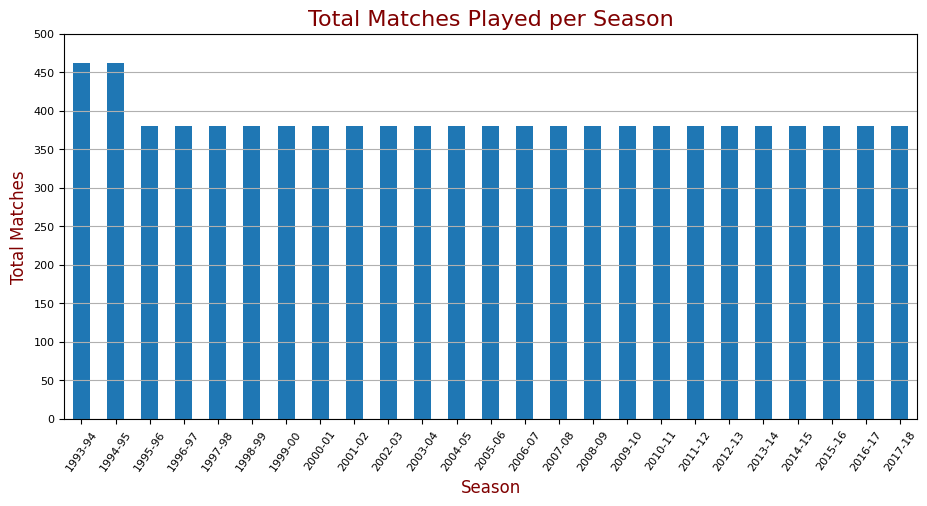

In [79]:
# creating a barplot to visualize the total matches played per season
paper = plt.figure(figsize = [11, 5])
eng_pre_lea_df.groupby('Season')['Season'].count().plot.bar()
plt.xticks(rotation = 55, size = 8)
plt.xlabel('Season', size = 12, color = 'maroon')
plt.yticks(np.arange(0, 501, 50), size = 8)
plt.ylabel('Total Matches', size = 12, color = 'maroon')
plt.title('Total Matches Played per Season', size = 16, color = 'maroon')
plt.grid(axis = 'y')
plt.show()

**Observations:**

- The total number of matches played in each season remains consistent from 1995-96, only exceptions are the very 1st 2 seasons.

**Number of Teams Played per Season**

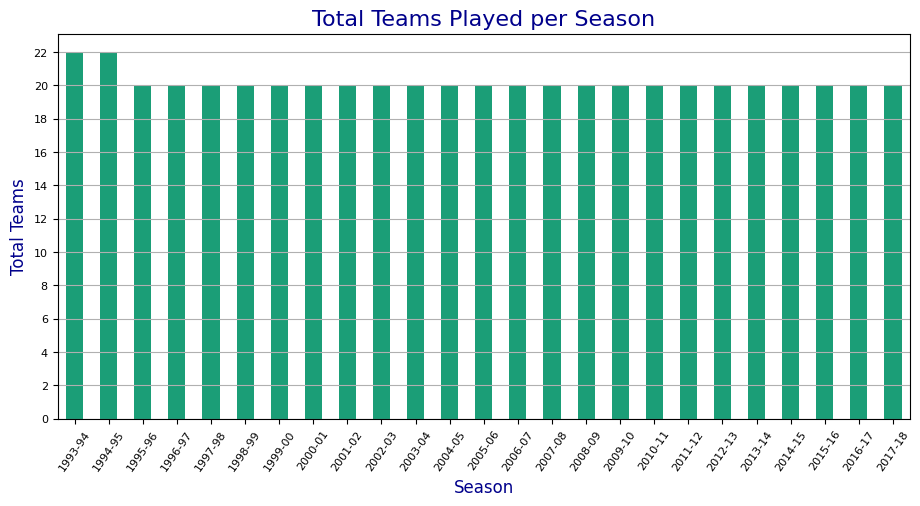

In [80]:
# creating a barplot to visualize the total unique teams played per season
paper = plt.figure(figsize = [11, 5])
eng_pre_lea_df.groupby('Season')['HomeTeam'].nunique().plot.bar(color = '#1B9E77')
plt.xticks(rotation = 55, size = 8)
plt.xlabel('Season', size = 12, color = 'darkblue')
plt.yticks(np.arange(0, 23, 2), size = 8)
plt.ylabel('Total Teams', size = 12, color = 'darkblue')
plt.title('Total Teams Played per Season', size = 16, color = 'darkblue')
plt.grid(axis = 'y')
plt.show()

**Observations:**

- Total teams played in each season remains consistent from 1995-96, only exceptions are the 1st 2 seasons; this helps us to conclude the reason of more number of matches in those seasons.

**Total Goals Scored per Season**

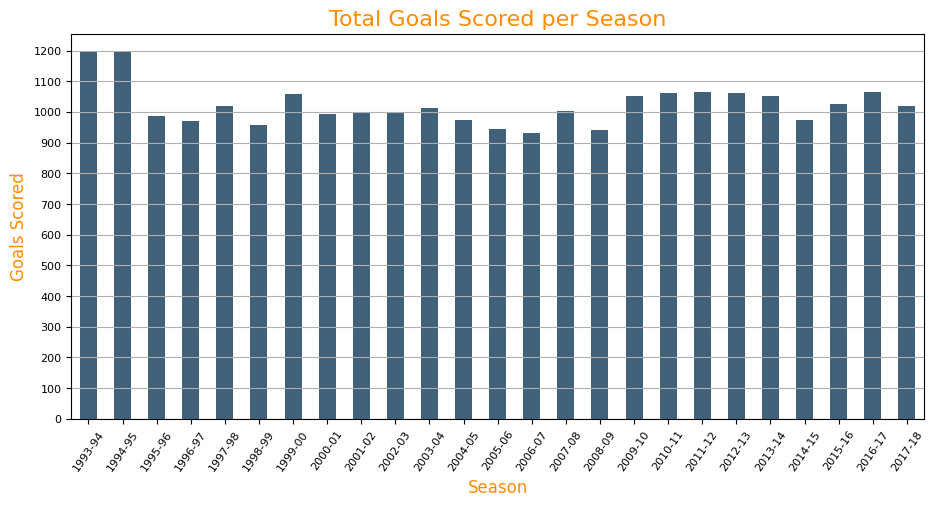

In [81]:
# creating a new column to calculate the total goals scored per match
eng_pre_lea_df['Total_Goals_Scored'] = eng_pre_lea_df['FTHG'] + eng_pre_lea_df['FTAG']

# creating a barplot to visualize the total goals scored per season
paper = plt.figure(figsize = [11, 5])
eng_pre_lea_df.groupby('Season')['Total_Goals_Scored'].sum().plot.bar(color = '#3F617A')
plt.xticks(rotation = 55, size = 8)
plt.xlabel('Season', size = 12, color = 'darkorange')
plt.yticks(np.arange(0, 1201, 100), size = 8)
plt.ylabel('Goals Scored', size = 12, color = 'darkorange')
plt.title('Total Goals Scored per Season', size = 16, color = 'darkorange')
plt.grid(axis = 'y')
plt.show()

**Observations:**

- There is no set pattern observed, however, more than 900 goals are scored each season; exception are the 1st 2 seasons where the total goals are maximum due to more number of teams playing as already observed.

**Average Goals Scored per Match per Season**

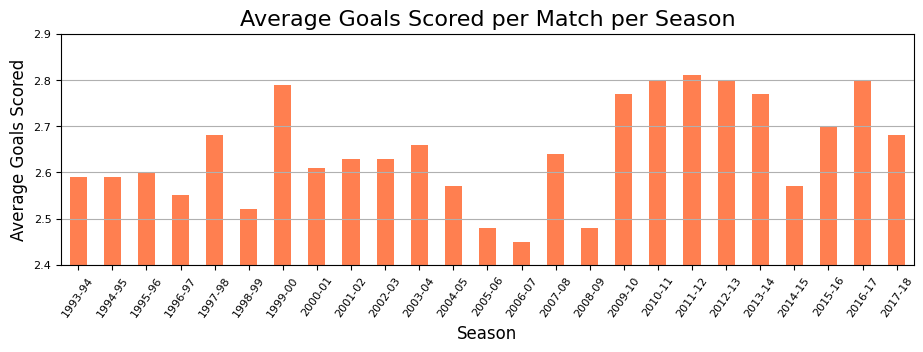

In [82]:
# creating a barplot to visualize the average goals scored/ match per season
fig, ax = plt.subplots(figsize = (11, 3))
round(eng_pre_lea_df.groupby('Season')['Total_Goals_Scored'].mean(), 2).plot.bar(color = 'coral')

# checking the min and max
round(eng_pre_lea_df.groupby('Season')['Total_Goals_Scored'].mean(), 2).min()    #2.45
round(eng_pre_lea_df.groupby('Season')['Total_Goals_Scored'].mean(), 2).max()    #2.81

plt.xticks(rotation = 55, size = 8)
plt.xlabel('Season', size = 12)
plt.ylim(2.4, 2.9)
plt.yticks(size = 8)
plt.ylabel('Average Goals Scored', size = 12)
plt.title('Average Goals Scored per Match per Season', size = 16)
plt.grid(axis = 'y')
plt.show()

**Observations:**

- From 2009-10 to 2017-18, there is a consistency in the average goals per match per season, apart from season 2014-15.
- Average goal for 2006-07 is the lowest compared to all the other seasons.

**Home vs Away Goal Scored per Season**

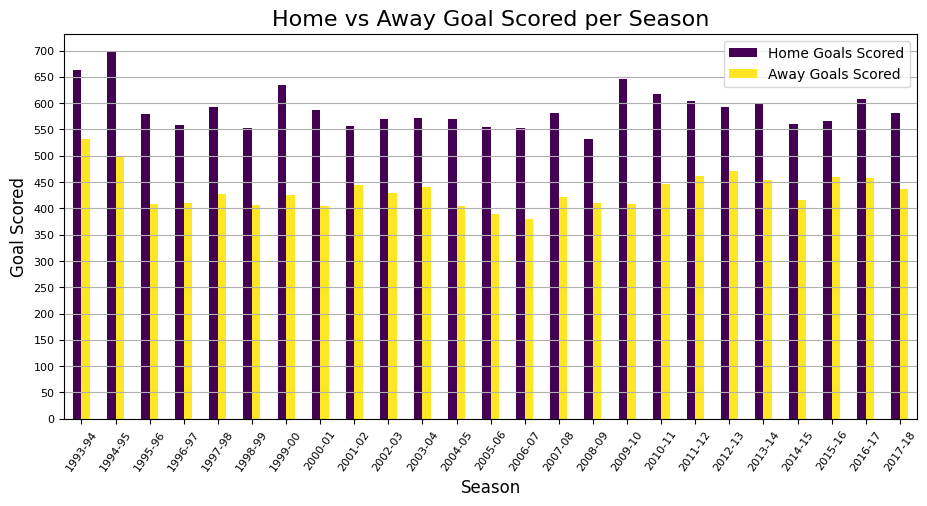

In [83]:
# creating a parallal barplot to visualize goals scored at home and away ground
fig, ax = plt.subplots(figsize = (11, 5))
eng_pre_lea_df.groupby('Season')[['FTHG', 'FTAG']].sum().plot.bar(ax = ax, cmap = 'viridis')
plt.xticks(rotation = 55, size = 8)
plt.xlabel('Season', size = 12)
plt.yticks(np.arange(0, 701, 50), size = 8)
plt.ylabel('Goal Scored', size = 12)
plt.title('Home vs Away Goal Scored per Season', size = 16)
plt.legend(labels = ('Home Goals Scored', 'Away Goals Scored'))
plt.grid(axis = 'y')
plt.show()

**Observations:**

- Home goals scored are consistently higher than away goals scored, indicating home ground advantage.

<a name = Section82></a>
### **8.2 Team Level Analysis**

- Total matches per team
- Number of seasons played per team
- Total goals scored vs conceded
- Total home vs away goals scored
- Total home vs away goals conceded
- HomeTeam goals scored vs conceded
- AwayTeam goals scored vs conceded
- Goal difference for HomeTeam
- Goal difference for AwayTeam
- HomeTeam and AwayTeam match result
- HomeTeam comeback while being behind at half-time
- AwayTeam comeback while being behind at half-time
- Home ground advantage

**Total Matches per Team**

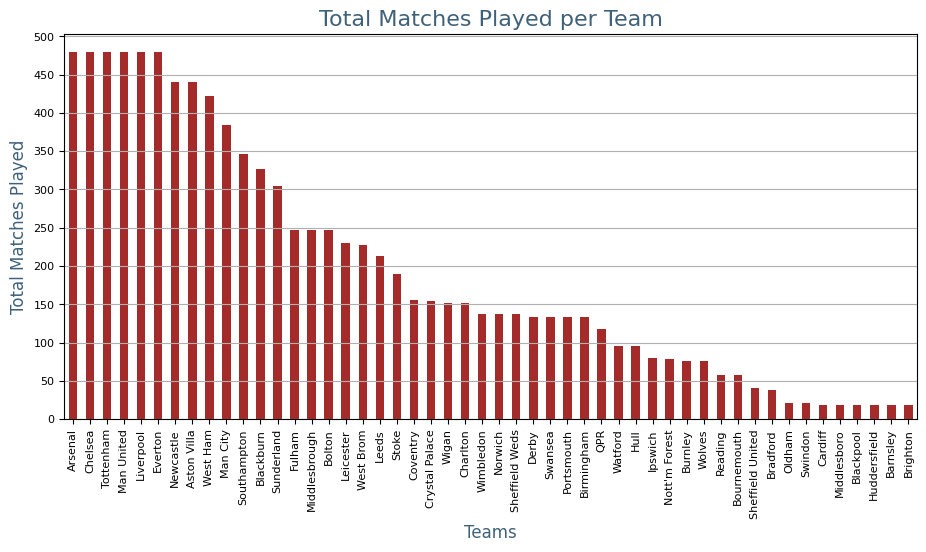

In [84]:
# creating a barplot to visualize the total matches played per team
paper = plt.figure(figsize = [11, 5])
eng_pre_lea_df.groupby('HomeTeam').size().sort_values(ascending = False).plot.bar(color = 'brown')
plt.xticks(size = 8)
plt.xlabel('Teams', size = 12, color = '#3F617A')
plt.yticks(np.arange(0, 501, 50), size = 8)
plt.ylabel('Total Matches Played', size = 12, color = '#3F617A')
plt.title('Total Matches Played per Team', size = 16, color = '#3F617A')
plt.grid(axis = 'y')
plt.show()

**Observations:**

- Arsenal, Chelsea, Tottenham, Man United, Liverpool and Everton are the only teams who played equal and maximum number of matches, indicating they played in all seasons.
- Least matches played by - Barnsley, Blackpool, Brighton, Cardiff, Middlesboro and Huddersfield.  

**Number of Seasons Played per Team**

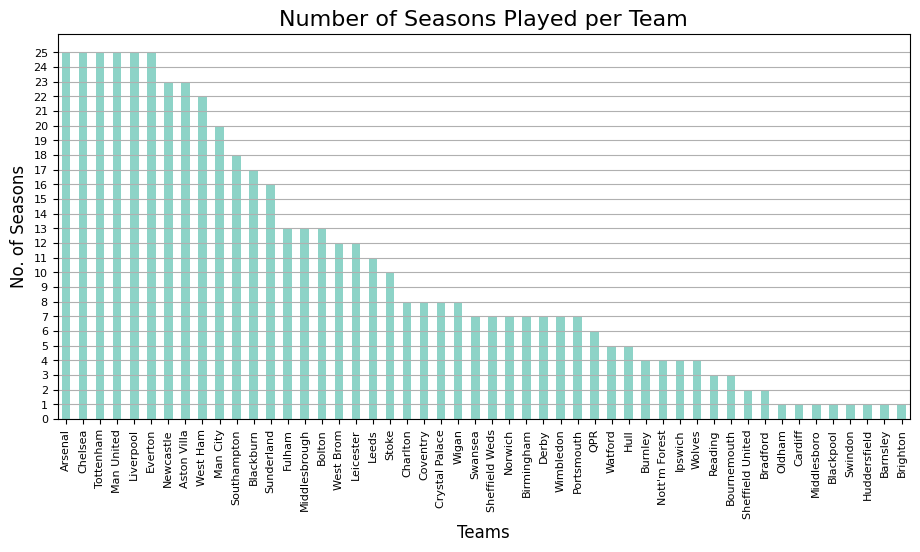

In [85]:
# creating a barplot to visualize the number of seasons played per team
paper = plt.figure(figsize = [11, 5])
eng_pre_lea_df.groupby('HomeTeam')['Season'].nunique().sort_values(ascending = False).plot.bar(cmap = 'Set3')
plt.xticks(size = 8)
plt.xlabel('Teams', size = 12)
plt.yticks(np.arange(0, 26, 1), size = 8)
plt.ylabel('No. of Seasons', size = 12)
plt.title('Number of Seasons Played per Team', size = 16)
plt.grid(axis = 'y')
plt.show()

**Observations:**

- Arsenal, Chelsea, Tottenham, Man United, Liverpool and Everton played all 25 seasons.
- Barnsley, Oldham, Blackpool, Brighton, Middlesboro, Cardiff, Swindon and Huddersfield played only 1 season.

**Total Goal Scored vs Conceded**

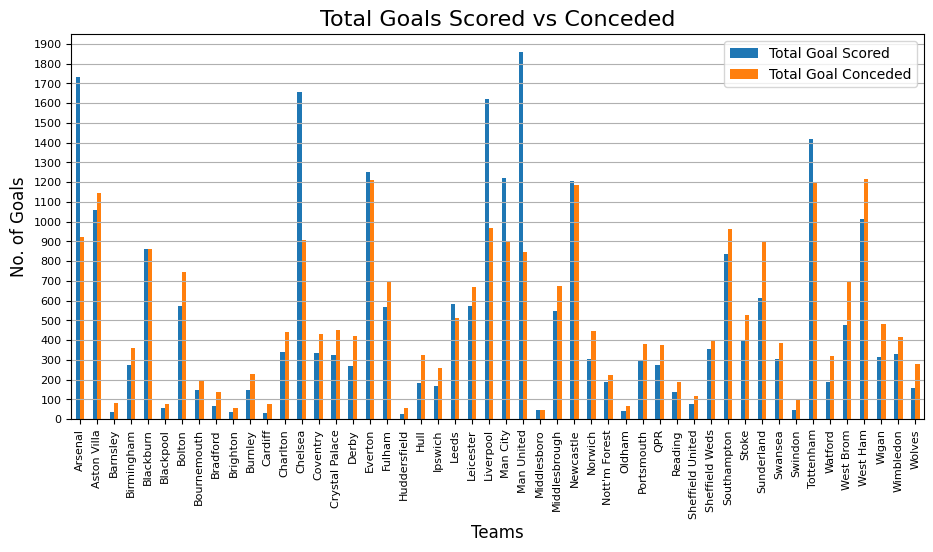

In [87]:
# assigning the sum of FTHG and FTAG to a variable 
total_goal_scored = eng_pre_lea_df.groupby('HomeTeam')['FTHG'].sum() + eng_pre_lea_df.groupby('AwayTeam')['FTAG'].sum()

# assigning the sum of FTHC and FTAC to a variable 
total_goal_conceded = eng_pre_lea_df.groupby('HomeTeam')['FTHC'].sum() + eng_pre_lea_df.groupby('AwayTeam')['FTAC'].sum()

# creating a parallal barplot to visualize the total goals scored vs conceded at a team level
fig, ax = plt.subplots(figsize = (11, 5))
pd.concat([total_goal_scored, total_goal_conceded], axis = 1).plot.bar(ax = ax)
plt.legend(labels = ['Total Goal Scored', 'Total Goal Conceded'])
plt.xticks(size = 8)
plt.xlabel('Teams', size = 12)
plt.yticks(np.arange(0, 1901, 100), size = 8)
plt.ylabel('No. of Goals', size = 12)
plt.title('Total Goals Scored vs Conceded', size = 16)
plt.grid(axis = 'y')
plt.show()

**Observations:**

- Man United has scored the maximum goals and the rest 5 teams (Arsenal, Chelsea, Tottenham, Liverpool and Everton) followed in line with the number of seasons they played.
- The teams who played the least matches conceded more goals, only exception is Middlesboro.         

**Total Home vs Away Goals Scored**

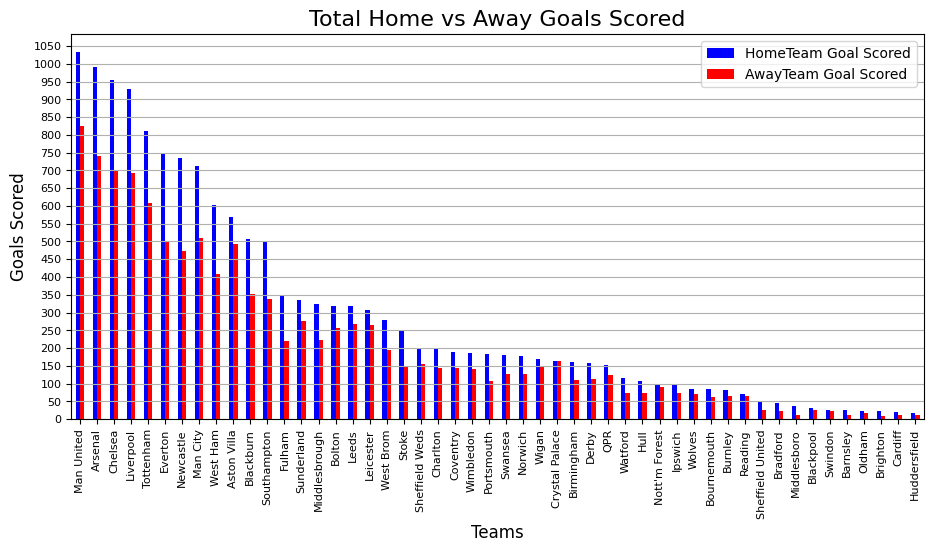

In [88]:
# assigning the sum of FTHG (no. of scored goals) and sorting them 
hometeams = eng_pre_lea_df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending = False)

# assigning the sum of FTAG (no. of scored goals)
awayteams = eng_pre_lea_df.groupby('AwayTeam')['FTAG'].sum()

# creating a parallal barplot to visualize home vs away goals scored
fig, ax = plt.subplots(figsize = (11, 5))
pd.concat([hometeams, awayteams], axis = 1).plot.bar(ax = ax, cmap = 'bwr')
plt.legend(labels = ['HomeTeam Goal Scored', 'AwayTeam Goal Scored'])
plt.xticks(size = 8)
plt.xlabel('Teams', size = 12)
plt.yticks(np.arange(0, 1051, 50), size = 8)
plt.ylabel('Goals Scored', size = 12)
plt.title('Total Home vs Away Goals Scored', size = 16)
plt.grid(axis = 'y')
plt.show()

**Observations:**

- Man United has scored the highest goals in both home and away ground.
- Crystal Palace is the only team who scored same in home and away ground.

**Total Home vs Away Goals Conceded**

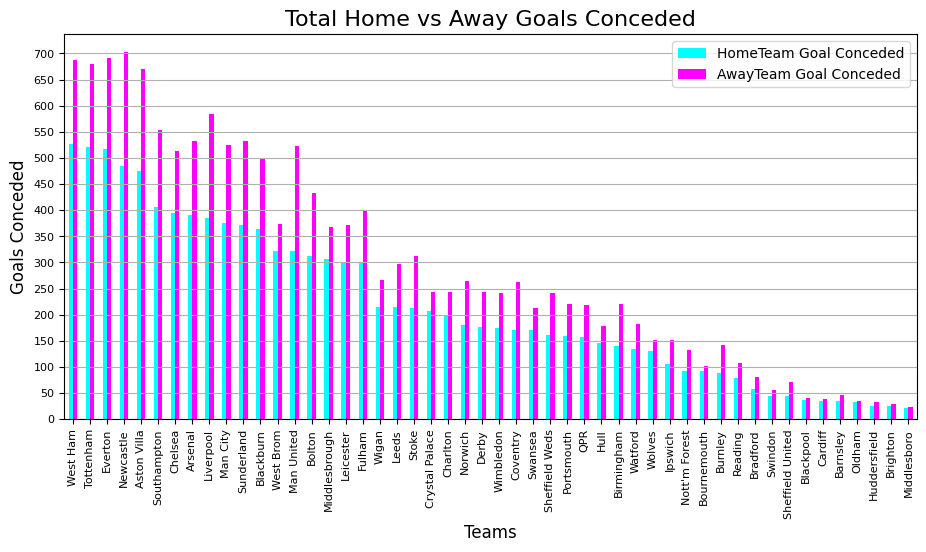

In [89]:
# assigning the sum of FTAG (no. of conceded goals) and sorting them
hometeamc = eng_pre_lea_df.groupby('HomeTeam')['FTHC'].sum().sort_values(ascending = False)

# assigning the sum of FTHG (no. of conceded goals)
awayteamc = eng_pre_lea_df.groupby('AwayTeam')['FTAC'].sum()

# creating a parallal barplot to visualize home vs away goals conceded
fig, ax = plt.subplots(figsize = (11, 5))
pd.concat([hometeamc, awayteamc], axis = 1).plot.bar(ax = ax, cmap = 'cool')
plt.legend(labels = ['HomeTeam Goal Conceded', 'AwayTeam Goal Conceded'])
plt.xticks(size = 8)
plt.xlabel('Teams', size = 12)
plt.yticks(np.arange(0, 701, 50), size = 8)
plt.ylabel('Goals Conceded', size = 12)
plt.title('Total Home vs Away Goals Conceded', size = 16)
plt.grid(axis = 'y')
plt.show()

**Observations:**

- All teams have conceded more goals playing as AwayTeam, Newcastle conceded the maximum.

**HomeTeam Goal Scored vs Conceded**

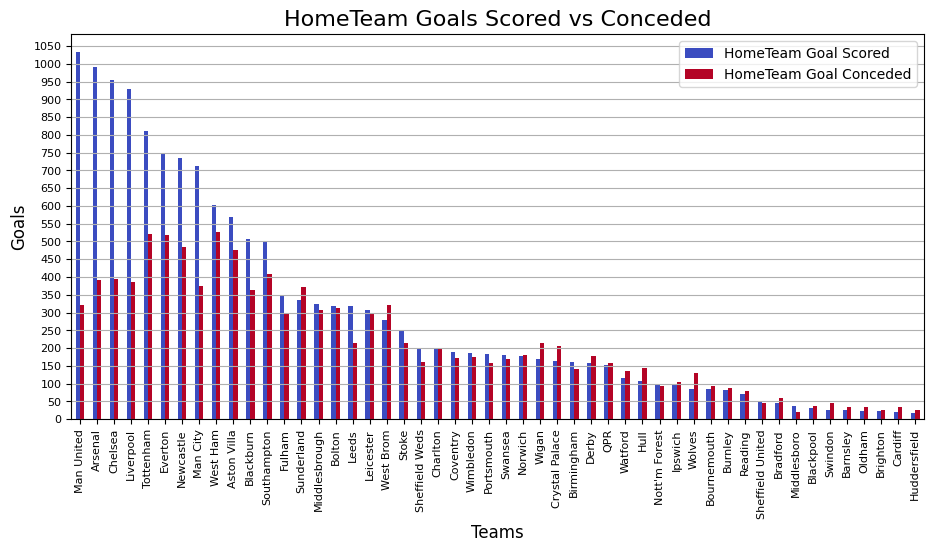

In [90]:
# creating a parallal barplot to visualize home goals scored vs conceded
fig, ax = plt.subplots(figsize = (11, 5))
eng_pre_lea_df.groupby('HomeTeam')[['FTHG', 'FTHC']].sum().sort_values('FTHG',ascending=False).plot.bar(ax = ax, 
                                                                                                     cmap = 'coolwarm')
plt.xticks(size = 8)
plt.xlabel('Teams', size = 12)
plt.yticks(np.arange(0, 1051, 50), size = 8)
plt.ylabel('Goals', size = 12)
plt.title('HomeTeam Goals Scored vs Conceded', size = 16)
plt.legend(labels = ('HomeTeam Goal Scored', 'HomeTeam Goal Conceded'))
plt.grid(axis = 'y')
plt.show()

**Observations:**

- At home ground, Man United, Arsenal, Chelsea & Liverpool are the 4 teams who scored almost double than the goals conceded.

**AwayTeam Goal Scored vs Conceded**

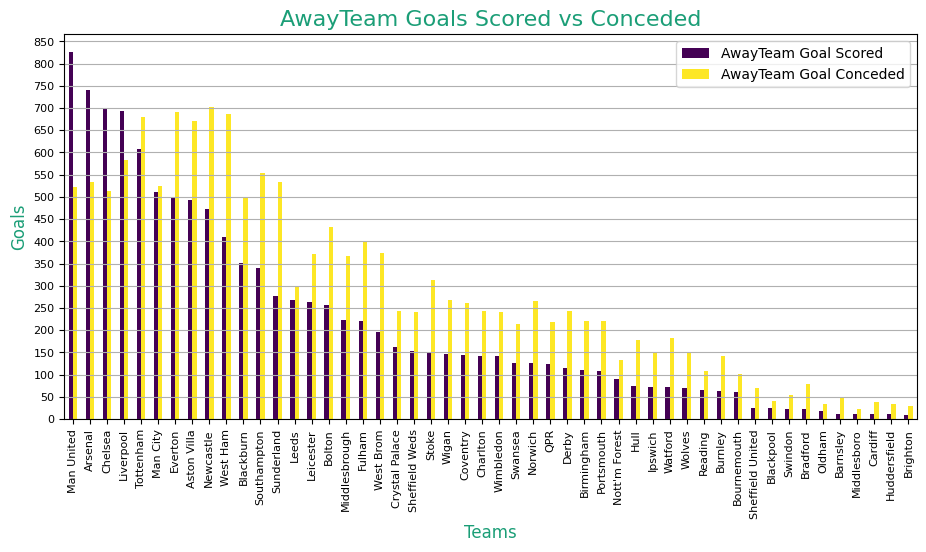

In [91]:
# creating a parallal barplot to visualize away goals scored vs conceded
fig, ax = plt.subplots(figsize = (11, 5))
eng_pre_lea_df.groupby('AwayTeam')[['FTAG', 'FTAC']].sum().sort_values('FTAG',ascending=False).plot.bar(ax = ax, 
                                                                                                    cmap = 'viridis')
plt.xticks(size = 8)
plt.xlabel('Teams', size = 12, color = '#1B9E77')
plt.yticks(np.arange(0, 851, 50), size = 8)
plt.ylabel('Goals', size = 12, color = '#1B9E77')
plt.title('AwayTeam Goals Scored vs Conceded', size = 16, color = '#1B9E77')
plt.legend(labels = ('AwayTeam Goal Scored', 'AwayTeam Goal Conceded'))
plt.grid(axis = 'y')
plt.show()

**Observations:**

- At away ground, Man United, Arsenal, Chelsea & Liverpool are the only 4 teams who scored more goals than conceded.

**Goal Difference for HomeTeam**

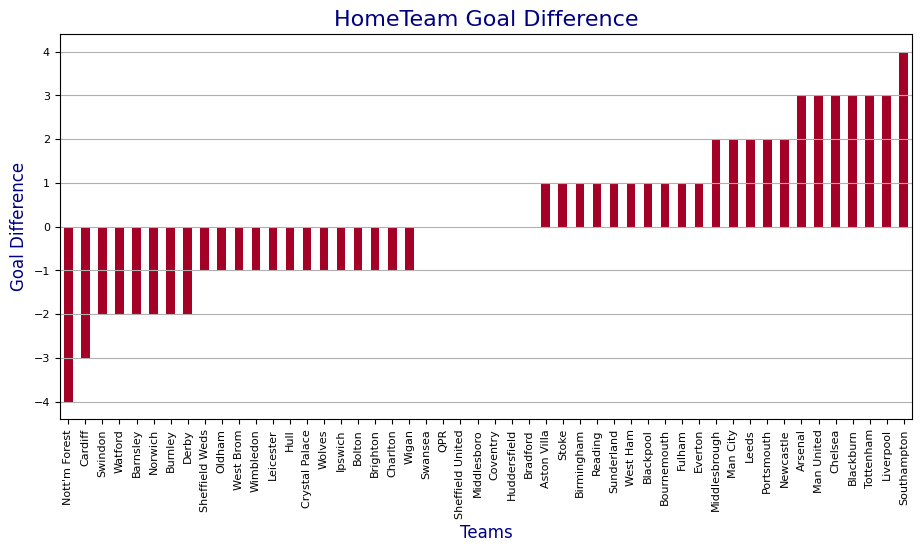

In [93]:
# assigning the calculated goal difference at home level
ht_goal_dif = eng_pre_lea_df.groupby('HomeTeam')[['FTHG', 'FTHC']].max() - eng_pre_lea_df.groupby('HomeTeam')[['FTHG', 
                                                                                                           'FTHC']].min()
# assigning only the goal difference of 'FTHG' & 'FTHC'
ht_goal_dif = ht_goal_dif['FTHG'] - ht_goal_dif['FTHC']

# creating a barplot to visualize the goal difference at home level
paper = plt.figure(figsize = [11, 5])
ht_goal_dif.sort_values(ascending = True).plot.bar(cmap = 'RdYlBu')
plt.xticks(size = 8)
plt.xlabel('Teams', size = 12, color = 'navy')
plt.yticks(size = 8)
plt.ylabel('Goal Difference', size = 12, color = 'navy')
plt.title('HomeTeam Goal Difference', size = 16, color = 'navy')
plt.grid(axis = 'y')
plt.show()

**Observations:**

- Southampton with the highest positive goal difference of +4.
- Nott'm Forest with the maximum negative goal difference of -4.
- 22 teams have a positive goal difference and 7 teams are neutral.

**Goal Difference for AwayTeam**

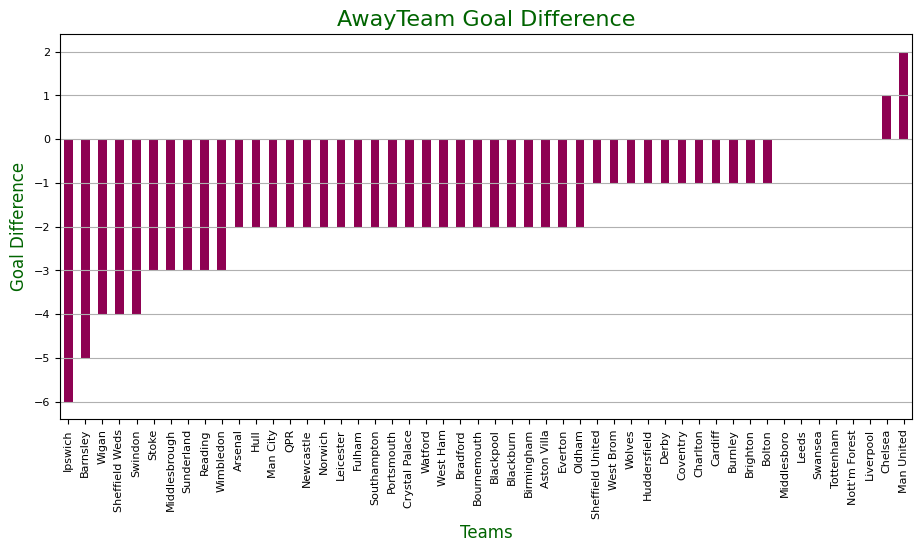

In [94]:
# assigning the calculated goal difference at away level
at_goal_dif = eng_pre_lea_df.groupby('AwayTeam')[['FTAG', 'FTAC']].max() - eng_pre_lea_df.groupby('AwayTeam')[['FTAG', 
                                                                                                             'FTAC']].min()
# assigning only the goal difference of 'FTAG', 'FTAC'
at_goal_dif = at_goal_dif['FTAG'] - at_goal_dif['FTAC']

# creating a barplot to visualize the goal difference at away level
paper = plt.figure(figsize = [11, 5])
at_goal_dif.sort_values(ascending = True).plot.bar(cmap = 'PiYG')
plt.xticks(size = 8)
plt.xlabel('Teams', size = 12, color = 'darkgreen')
plt.yticks(size = 8)
plt.ylabel('Goal Difference', size = 12, color = 'darkgreen')
plt.title('AwayTeam Goal Difference', size = 16, color = 'darkgreen')
plt.grid(axis = 'y')
plt.show()

**Observations:**

- Chelsea and Man United are the only teams whose goal difference is positive.
- Ipswich has the maximum negative goal difference of -6.
- 6 teams are neutral. Middlesboro and Swansea are the only teams who are neutral in both home and away ground.

**HomeTeam and AwayTeam Match Result**

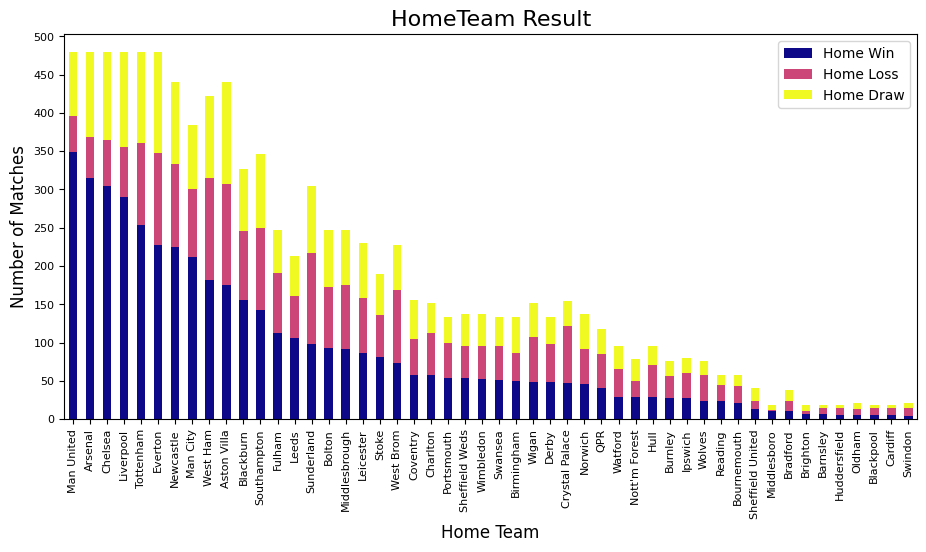

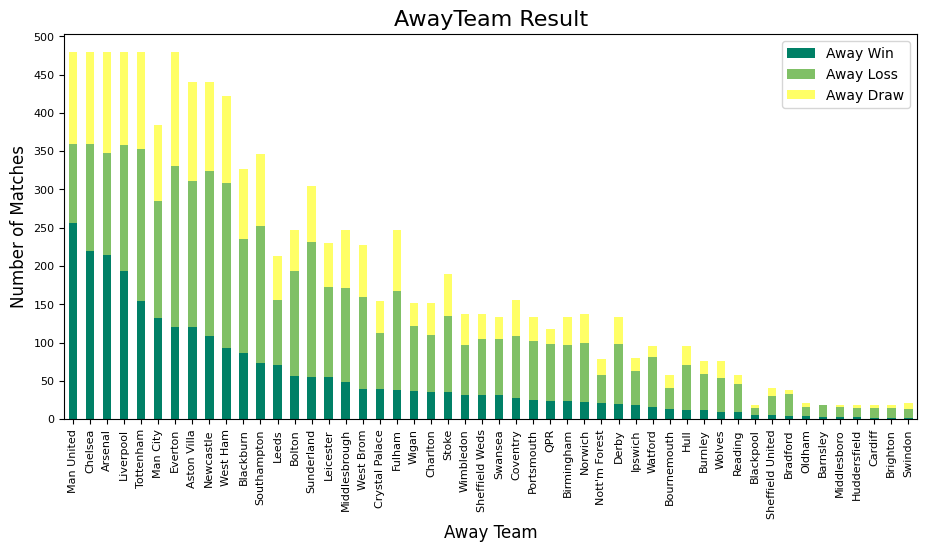

In [111]:
# assigning the data by reshaping to store the number of home wins, home losses and home draws
unstack_counts = eng_pre_lea_df.groupby(['HomeTeam', 'FTR']).size().unstack(1)

# assigning the order
unstack_counts = unstack_counts[['H', 'A', 'D']]

# creating a stacked barplot to visualize the home win, home losses and home draws 
fig, ax = plt.subplots(figsize = (11, 5))
unstack_counts.sort_values('H', ascending = False).plot.bar(cmap = 'plasma', ax = ax, stacked = True)
plt.xticks(size = 8)
plt.xlabel('Home Team', size = 12)
plt.yticks(np.arange(0, 501, 50), size = 8)
plt.ylabel('Number of Matches', size = 12)
plt.title('HomeTeam Result', size = 16)
plt.legend(labels = ('Home Win', 'Home Loss', 'Home Draw'))
plt.show()

# assigning the data by reshaping to store the number of away wins, away losses and away draws
unstack_counts = eng_pre_lea_df.groupby(['AwayTeam', 'FTR']).size().unstack(1)

# assigning the order
unstack_counts = unstack_counts[['A', 'H', 'D']]

# creating a stacked barplot to visualize the away win, away losses and away draws
fig, ax = plt.subplots(figsize = (11, 5))
unstack_counts.sort_values('A', ascending = False).plot.bar(cmap = 'summer', ax = ax, stacked = True)
plt.xticks(size = 8)
plt.xlabel('Away Team', size = 12)
plt.yticks(np.arange(0, 501, 50), size = 8)
plt.ylabel('Number of Matches', size = 12)
plt.title('AwayTeam Result', size = 16)
plt.legend(labels = ('Away Win', 'Away Loss', 'Away Draw'))
plt.show()

#(created 2 different plots as subplots weren't aesthetically pleasing)

**Observations:**

- Chances of winning at home ground compared to away ground is more.
- Other way round, chances of losing at away ground compared to home ground is more.

**Home Team Comeback**

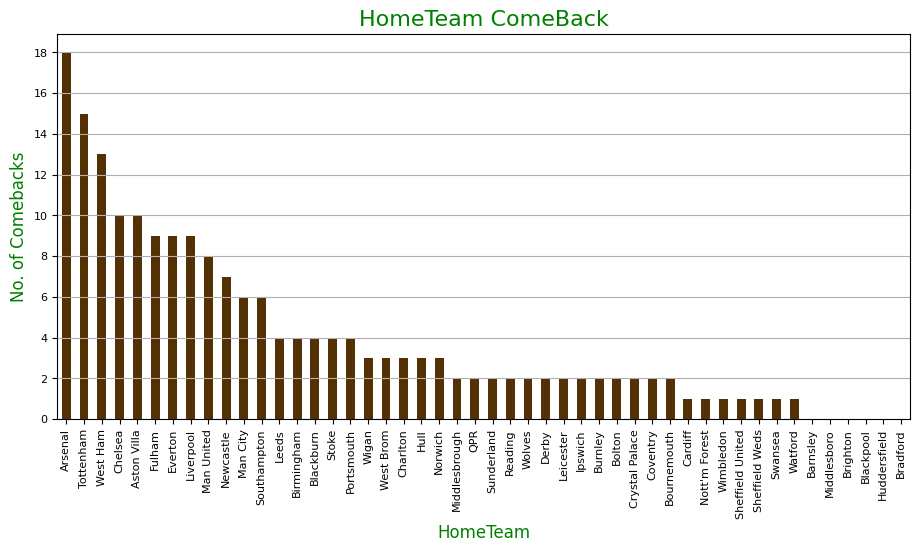

In [112]:
# creating a copy of the current data set to analyze further
ht_comeback = eng_pre_lea_df.copy()

# filtered data is assigned where 'fulltime result'!='halftime result' & 'fulltime result'!='draw' & 'halftime result'!='draw'
ht_comeback['Comeback']=np.where((ht_comeback['FTR']!=ht_comeback['HTR'])&(ht_comeback['FTR']!='D') 
                                 & (ht_comeback['HTR']!='D'),1,0)

# assigning the sum of home combacks where 'half-time result' == 'loss'
ht_cb = ht_comeback.loc[(ht_comeback['HTR'] =='A')].groupby('HomeTeam')['Comeback'].sum()

# creating a barplot to visualize home comback while being behind at half-time 
paper = plt.figure(figsize = [11, 5])
ht_cb.sort_values(ascending = False).plot.bar(cmap = 'BrBG')
plt.xticks(size = 8)
plt.xlabel('HomeTeam', size = 12, color = 'green')
plt.yticks(np.arange(0, 19, 2), size = 8)
plt.ylabel('No. of Comebacks', size = 12, color = 'green')
plt.title('HomeTeam ComeBack', size = 16, color = 'green')
plt.grid(axis = 'y')
plt.show()

**Observations:**

- Arsenal has the maximum home comebacks while being behind at half-time, a total of 18 times resulted in a win.
- Brighton, Middlesboro, Bradford, Blackpool, Huddersfield and Barnsley has no home comebacks.

**AwayTeam Comeback**

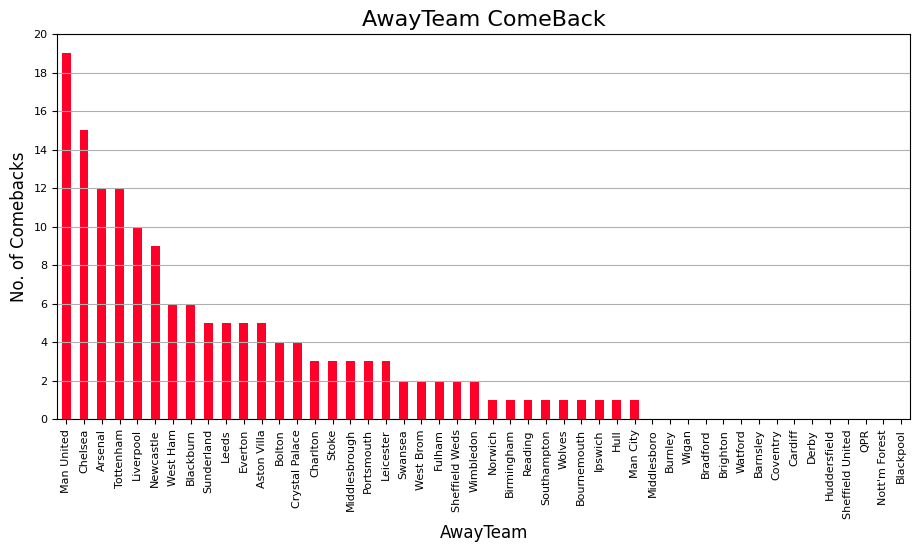

In [113]:
# assigning the sum of away combacks where 'half-time result' == 'loss'
at_cb = ht_comeback.loc[(ht_comeback['HTR'] == 'H')].groupby('AwayTeam')['Comeback'].sum()

# creating a barplot to visualize away comback while being behind at half-time 
paper = plt.figure(figsize = [11, 5])
at_cb.sort_values(ascending=False).plot.bar(cmap = 'gist_rainbow')
plt.xticks(size = 8)
plt.xlabel('AwayTeam', size = 12)
plt.yticks(np.arange(0, 21, 2), size = 8)
plt.ylabel('No. of Comebacks', size = 12)
plt.title('AwayTeam ComeBack', size = 16)
plt.grid(axis = 'y')
plt.show()

**Observations:**

- Man United has the maximum away comebacks while being behind at half-time, a total of 19 times resulted in a win.
- 15 teams yet to have an away comeback.

**Home Ground Advantage**

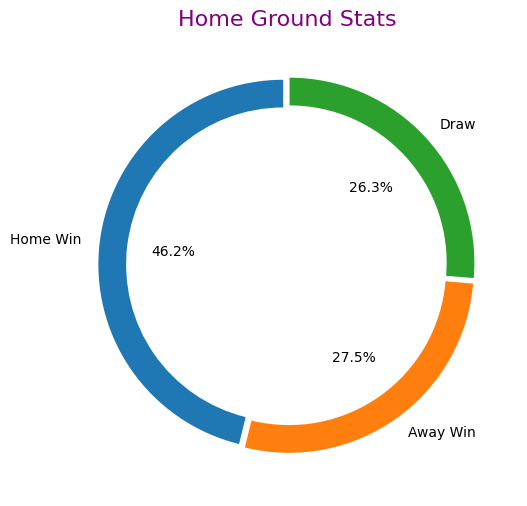

In [114]:
# creating a donut plot to visualize the % of home wins, draws and away wins
paper = plt.figure(figsize = [6, 6])

space = np.ones(eng_pre_lea_df['FTR'].nunique())/50

eng_pre_lea_df['FTR'].value_counts().plot(kind = 'pie', explode = space,
                                       autopct = '%.1f%%', wedgeprops = dict(width = 0.15), 
                                       startangle = 90, labels = ['Home Win', 'Away Win', 'Draw'])
plt.ylabel('')
plt.title('Home Ground Stats', size = 16, color = 'purple')
plt.show()

### **Observations:**

- The above graph clearly showcases that HomeTeam has home ground advantage. 

<a name = Section83></a>
### **8.3 Top Team Analysis**

- Total Home and Away goals scored vs conceded per top team
- Top team home vs away match result

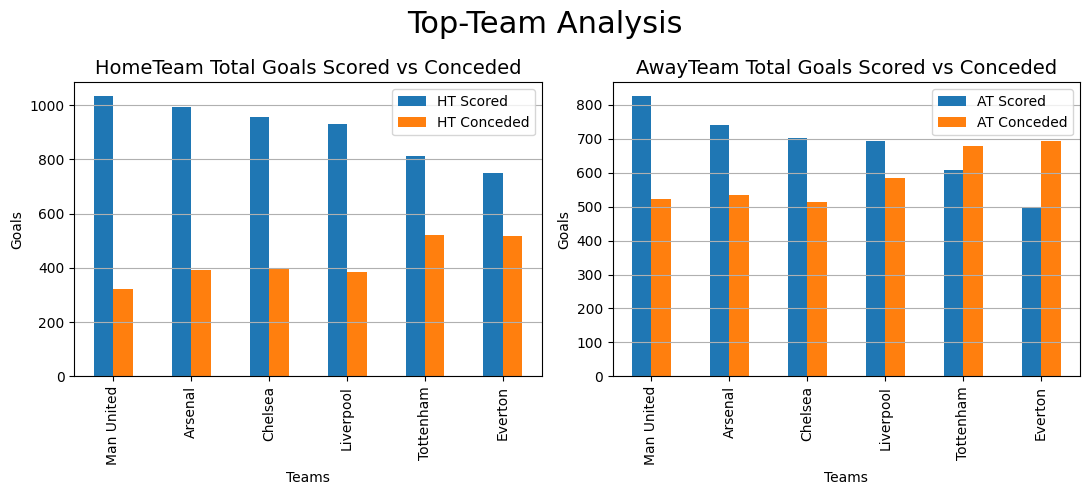

In [102]:
# filtering the data with the 6 teams (teams who played the maximum & equal number of matches - previously analyzed)
plot_df_x = eng_pre_lea_df.query("HomeTeam.isin(['Arsenal', 'Chelsea', 'Tottenham', 'Man United', 'Liverpool', 'Everton'])")
plot_df_y = eng_pre_lea_df.query("AwayTeam.isin(['Arsenal', 'Chelsea', 'Tottenham', 'Man United', 'Liverpool', 'Everton'])")

# team names are stored in a variable
team = ['Arsenal', 'Chelsea', 'Tottenham', 'Man United', 'Liverpool', 'Everton']

# instantiate a figure of size of 11 * 5 inches with 2 subplots.
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (11, 5))

# creating parallal barplot to visualize at home level goals scored vs conceded
plot_df_x.groupby('HomeTeam')[['FTHG', 'FTHC']].sum().sort_values('FTHG', ascending = False).plot.bar(ax = ax[0])
ax[0].set_title(label = 'HomeTeam Total Goals Scored vs Conceded', size = 14)
ax[0].set_ylabel(ylabel = 'Goals', size = 10)
ax[0].set_xlabel(xlabel = 'Teams', size = 10)
ax[0].legend(labels = ["HT Scored", 'HT Conceded'])
ax[0].grid(axis = 'y')

# creating parallal barplot to visualize at away level goals scored vs conceded
plot_df_y.groupby('AwayTeam')[['FTAG', 'FTAC']].sum().sort_values('FTAG', ascending = False).plot.bar(ax = ax[1]) 
ax[1].set_title(label = 'AwayTeam Total Goals Scored vs Conceded', size = 14)
ax[1].set_ylabel(ylabel = 'Goals', size = 10)
ax[1].set_xlabel(xlabel = 'Teams', size = 10)
ax[1].legend(labels = ["AT Scored", 'AT Conceded'])
ax[1].grid(axis = 'y')

plt.suptitle(t = 'Top-Team Analysis', size = 22)
plt.tight_layout()

**Observations:**

- At home ground, all the top teams scored more and conceded less goals, Man United is leading with maximum goals scored and minimum goals conceded.
- At away ground, Tottenham and Everton conceded more goals than scoring, Man United is leading with maximum goals scored.

**Top Team Home vs Away Match Result**

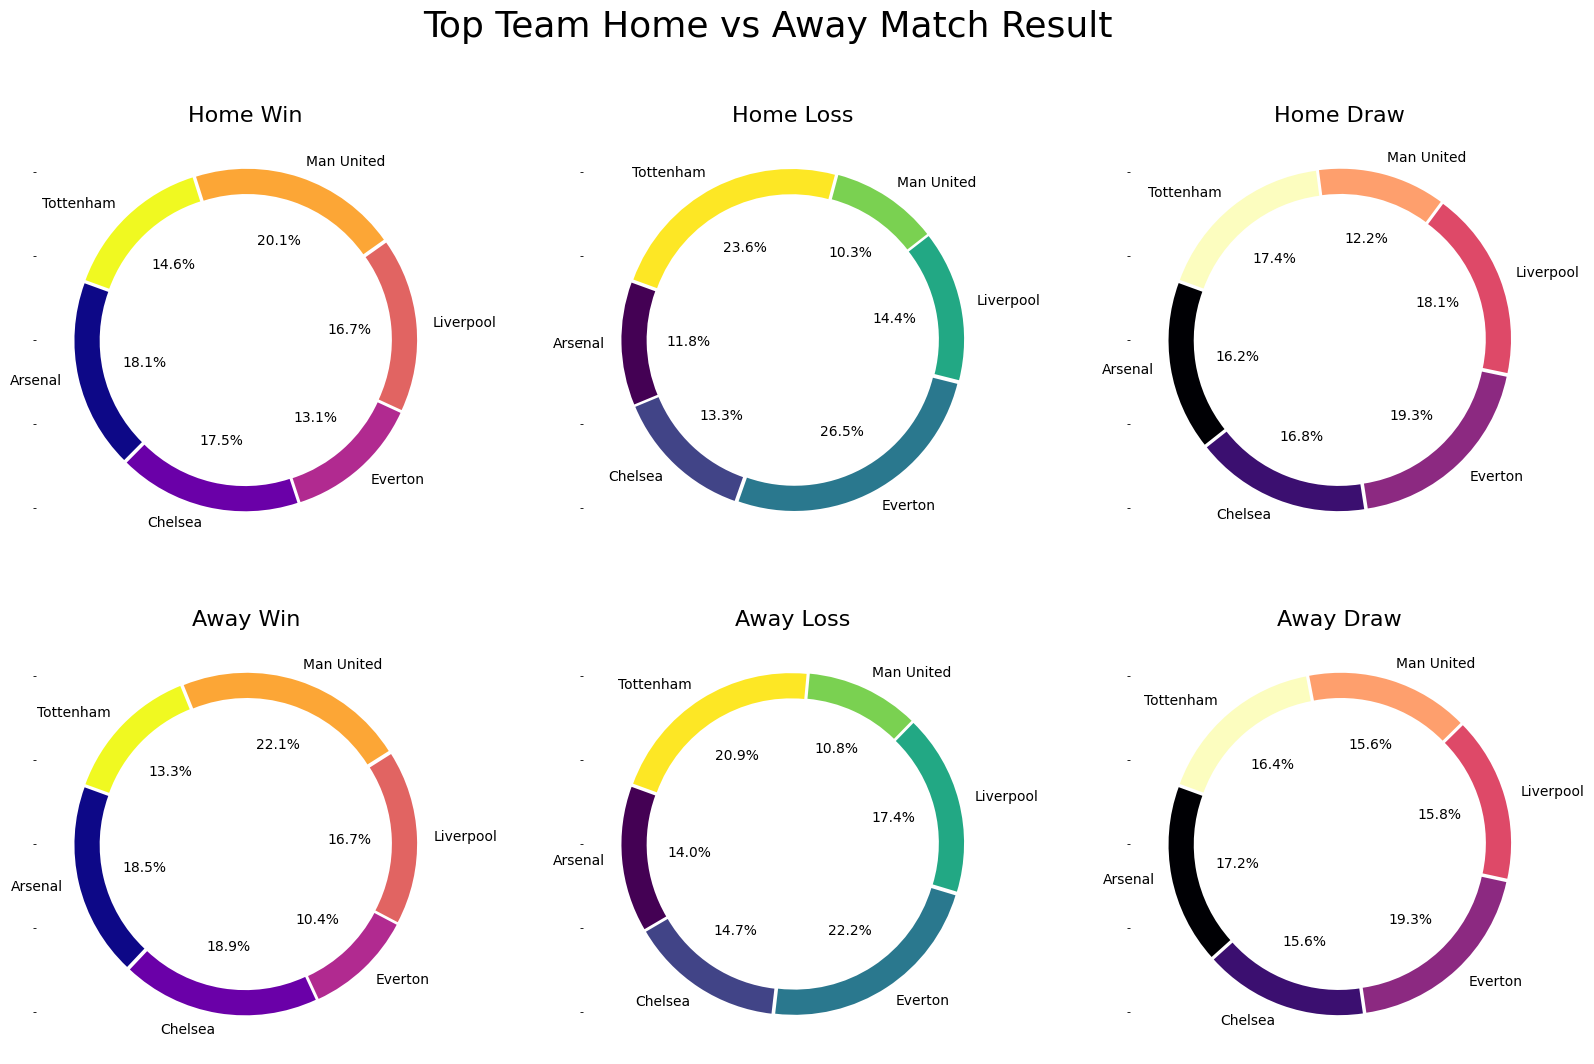

In [115]:
#plot_df_x = eng_pre_lea_df.query("HomeTeam.isin(['Arsenal', 'Chelsea', 'Tottenham', 'Man United', 'Liverpool', 'Everton'])")

# asssigning 'H', 'A' and 'D'
plot_df_x['TopHTWin'] = plot_df_x['FTR'] == 'H'
plot_df_x['TopHTLoss'] = plot_df_x['FTR'] == 'A'
plot_df_x['TopHTDraw'] = plot_df_x['FTR'] == 'D'

# instantiate a figure of size of 20 * 12 inches with 6 subplots.
f, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 12), sharey = True)

# creating donut plots to visualize the home win vs draw vs loss %
space = np.ones(plot_df_x['HomeTeam'].nunique()) / 50

plot_df_x.groupby('HomeTeam')['TopHTWin'].sum().plot(kind = 'pie', explode = space, autopct = '%.1f%%',
                                                     wedgeprops = dict(width = 0.15), startangle = 160, ax = ax[0, 0], 
                                                     cmap = 'plasma')
ax[0, 0].set_title(label='Home Win', size = 16)
ax[0, 0].set_ylabel('')

plot_df_x.groupby('HomeTeam')['TopHTLoss'].sum().plot(kind = 'pie', explode = space, autopct = '%.1f%%',
                                                      wedgeprops = dict(width = 0.15), startangle = 160, ax = ax[0, 1], 
                                                      cmap = 'viridis')
ax[0, 1].set_title(label='Home Loss', size = 16)
ax[0, 1].set_ylabel('')

plot_df_x.groupby('HomeTeam')['TopHTDraw'].sum().plot(kind = 'pie', explode = space, autopct = '%.1f%%',
                                                      wedgeprops = dict(width = 0.15), startangle = 160, ax = ax[0, 2], 
                                                      cmap = 'magma')
ax[0, 2].set_title(label='Home Draw', size = 16)
ax[0, 2].set_ylabel('')

plt.suptitle(t='Top Team Home vs Away Match Result', size = 26)

#plot_df_y = eng_pre_lea_df.query("AwayTeam.isin(['Arsenal', 'Chelsea', 'Tottenham', 'Man United', 'Liverpool', 'Everton'])")

# asssigning 'H', 'A' annd 'D'
plot_df_y['TopATWin'] = plot_df_y['FTR'] == 'A'
plot_df_y['TopATLoss'] = plot_df_y['FTR'] == 'H'
plot_df_y['TopATDraw'] = plot_df_y['FTR'] == 'D'

# creating donut plots to visualize the away win vs draw vs loss %
space = np.ones(plot_df_y['AwayTeam'].nunique()) / 50

plot_df_y.groupby('AwayTeam')['TopATWin'].sum().plot(kind = 'pie', explode = space, autopct = '%.1f%%',
                                                     wedgeprops = dict(width = 0.15), startangle = 160, ax = ax[1, 0], 
                                                     cmap = 'plasma')
ax[1, 0].set_title(label='Away Win', size = 16)
ax[1, 0].set_ylabel('')

plot_df_y.groupby('AwayTeam')['TopATLoss'].sum().plot(kind = 'pie', explode = space, autopct = '%.1f%%',
                                                      wedgeprops = dict(width = 0.15), startangle = 160, ax = ax[1, 1], 
                                                      cmap = 'viridis')
ax[1, 1].set_title(label='Away Loss', size = 16)
ax[1, 1].set_ylabel('')

plot_df_y.groupby('AwayTeam')['TopATDraw'].sum().plot(kind = 'pie', explode = space, autopct = '%.1f%%',
                                                      wedgeprops = dict(width = 0.15), startangle = 160, ax = ax[1, 2], 
                                                      cmap = 'magma')
ax[1, 2].set_title(label='Away Draw', size = 16)
ax[1, 2].set_ylabel('')

plt.show()

**Observations:**

- At both home and away ground Man United is the most successful team with a winning percentage of 20.1% and 22.1% respectively.
- Also, as observed, Man United is the most consistent team both at home and away ground with respect to the minimum percentage of loss (home: 10.3% & away: 10.8%) and draw (home: 12.2% & away: 15.6%).

<a name = Section84></a>
### **8.4 Point Level Analysis**

In [104]:
# assigning points to home and away teams, for win = 3, draw = 1, loss = 0 and assigning data type to 'int'
eng_pre_lea_df['Home_Points'] = np.where(eng_pre_lea_df['FTR'] == 'H', 3, np.where(eng_pre_lea_df['FTR'] 
                                                                                   == 'D', 1, 0)).astype('int')
eng_pre_lea_df['Away_Points'] = np.where(eng_pre_lea_df['FTR'] == 'A', 3, np.where(eng_pre_lea_df['FTR'] 
                                                                                   == 'D', 1, 0)).astype('int')

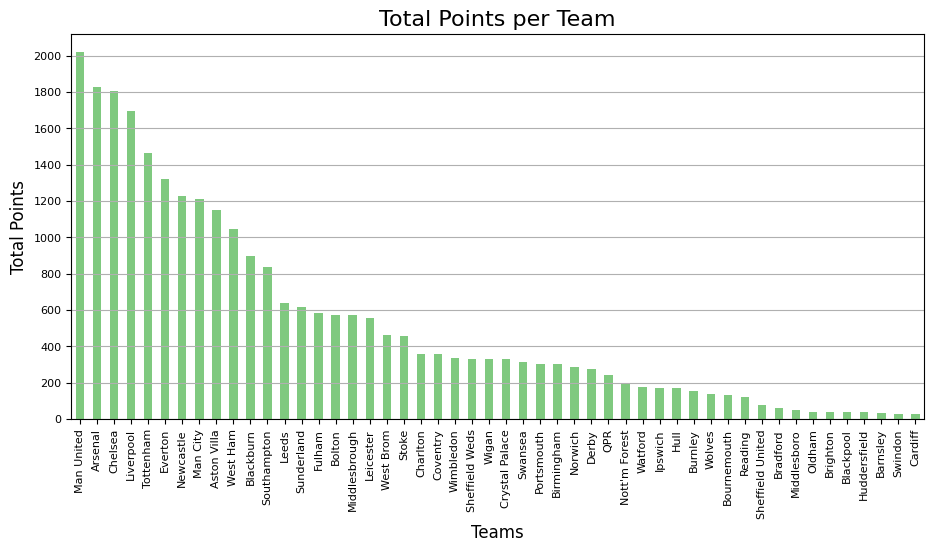

In [106]:
# assigning the total sum of home and away points
plot_df_points = eng_pre_lea_df.groupby('HomeTeam')['Home_Points'].sum() + eng_pre_lea_df.groupby('AwayTeam')['Away_Points'].sum()

# creating a barplot to visualize the total points per team
paper = plt.figure(figsize = [11, 5])
plot_df_points.sort_values(ascending = False).plot.bar(cmap = 'Accent')
plt.xticks(size = 8)
plt.xlabel('Teams', size = 12)
plt.yticks(np.arange(0, 2001, 200), size = 8)
plt.ylabel('Total Points', size = 12)
plt.title('Total Points per Team', size = 16)
plt.grid(axis = 'y')
plt.show()

**Observations:**
- Man United has the highest points, followed by Arsenal and Chelsea.
- Lowest points are hold by the teams who played only 1 season.

**Champion per Season**

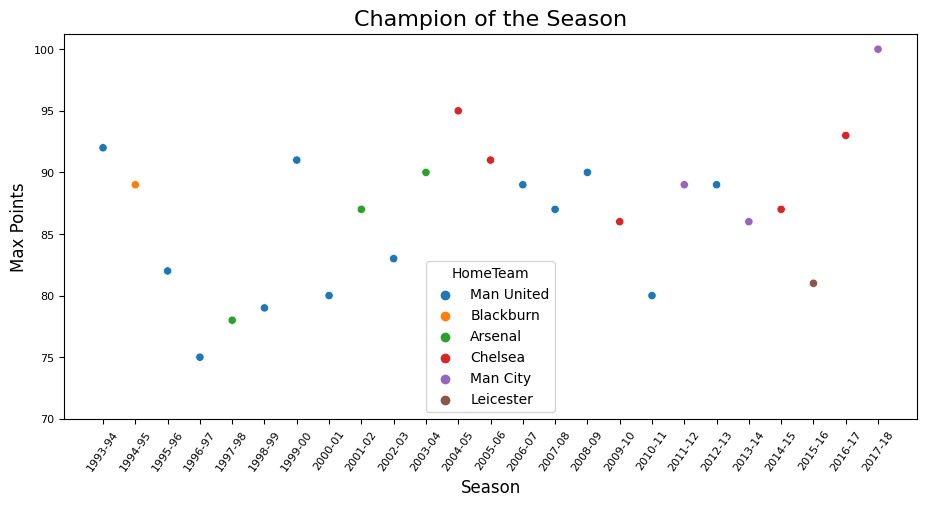

In [116]:
# assigning the sum of home point by 'Season', and 'HomeTeam'
home_results = pd.DataFrame(eng_pre_lea_df.groupby(['Season', 'HomeTeam'])['Home_Points'].sum())

# assigning the sum of away point by 'Season', and 'AwayTeam'
away_results = pd.DataFrame(eng_pre_lea_df.groupby(['Season', 'AwayTeam'])['Away_Points'].sum())

# combining home_results and away_results to get the total points for each team per season
champion_season = home_results.reset_index().merge(away_results.reset_index(), 
                                                   left_on = ['Season', 'HomeTeam'], right_on = ['Season', 'AwayTeam'])
champion_season['Total_Points'] = champion_season['Home_Points'] + champion_season['Away_Points']

# assigning the dtype
champion_season[['Total_Points', 'Home_Points', 'Away_Points']].astype('int')

# for each season, selecting the team with the maximum 'Total_Points' using idxmax(). This will give the champion of each 
#season, and the result is stored in the DataFrame top_team.
top_team = champion_season.loc[champion_season.groupby('Season')['Total_Points'].idxmax()]

# creating a scatterplot to visualize the champions of the season
figure = plt.figure(figsize = [11, 5])
sns.scatterplot(x = 'Season', y = 'Total_Points', hue = 'HomeTeam', data = top_team)
plt.xticks(rotation = 55, size = 8)
plt.xlabel('Season', size = 12)
plt.yticks(np.arange(70, 101, 5), size = 8)
plt.ylabel('Max Points', size = 12)
plt.title('Champion of the Season', size = 16)
plt.show()

**Observations:**
- Over the seasons maximum titles won by Man United (12 times) followed by Chelsea (5 times).
- During the analyses it is observed that Arsenal is appearing as 2nd best to Man United in performance, however, they have failed to convert to championship (3 times) compared to Chelsea.
- Though 'Tottenham', 'Liverpool' and 'Everton' played the same number of matches as the aforementioned teams, they have not been able to win the championship yet.

<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- Apart from the 1st 2 seasons, 20 teams played with a total of 380 matches per season since 1995-1996.

- More than 900 goals in total are scored each season; home goals scored are consistently higher than away goals; chances of winning at home ground is 46.2% compared to away win of 27.5%.

- Man United scored the highest goals in both home and away grounds; has the maximum away comebacks (19 times) while losing at half-time.

- All teams have conceded more goals at away ground compared to goals conceded at home ground.

- At home ground, Man United, Arsenal, Chelsea & Liverpool are the 4 teams who scored almost double than the goals conceded, at away ground they are again the 4 teams who scored more goals than conceded.

- Southampton with the highest positive goal difference at home level; Chelsea and Man United are the only teams whose goal difference is positive at away level.

- Arsenal has the maximum home comebacks (18 times) while losing at half-time.

- Irrespective of home and away ground Man United is the most successful team with a winning percentage of 20.1% and 22.1% respectively. Also, they are the most consistent team both at home and away ground with respect to the minimum percentage of loss (home: 10.3% & away: 10.8%) and draw (home: 12.2% & away: 15.6%).

- Man United has the highest points, followed by Arsenal and Chelsea.

- Arsenal, Chelsea, Tottenham, Man United, Liverpool and Everton played in all 25 seasons.

- Over the seasons maximum titles won by Man United (12 times) followed by Chelsea (5 times).

- It can be inferred that Arsenal, despite appearing as 2nd best to Man United in points, they have failed to win more number of championships compared to Chelsea.

- Despite playing in all the seasons, 'Tottenham', 'Liverpool' and 'Everton' have not been able to win the championship yet.

<a name = Section92></a>
### **9.2 Actionable Insights**

- Focus on Home Advantage: As observed, teams mostly perform better when playing at their home ground, it is important to capitalize on home advantage and should aim for bigger margin wins.

- Analyze Second-half Performance: Analyze the teams’ 2nd half performance who has made a comeback while losing at half-time, identify areas of improvement and work on strategies to turn around the 1st half when the game is not going well.

- Defensive Improvement for Away Matches: At away ground, as most teams concede more. It is important in strengthening the team's defense by practicing defensive strategies.

- Learn from Successful Teams: Observe and analyze the playing styles and strategies of successful and experienced teams. Adapt and incorporate the key factors to a success and at the same time innovate and tailor new strategies.

- Evaluate Title Winning Potential: Man United has been the most consistent & successful team in terms of winning championships and is the safest bet for investor/ sponsor. While Arsenal has performed well in accumulating points but failed to win more championships compared to Chelsea, hence, investing on Chelsea could be the 2nd best option.

- Analyze Market Potential: Teams who are consistently performing well and are in the game for a longer time can translate into higher brand exposure and commercial opportunities, resulting higher return for the investor/ sponsor.